# Expression Quality Control (Part 1)
This is a template notebook for performing preliminary quality control on your organism's expression data.

## Setup

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path

In [14]:
sns.set_style('ticks')

### Inputs

Enter path of log-TPM, MultiQC, and metadata files here

In [15]:
metadata_file = path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/6_quality_control/metadata.xlsx') # Enter log-TPM filename here
logTPM_file = path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/6_quality_control/data.xlsx') # Enter metadata filename here



### Load expression data

In [16]:
DF_log_tpm = pd.read_excel(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 1608
Number of samples: 3047


,cg0001,cg0002,cg0004,cg0005,cg0006,cg0007,cg0008,cg0009,cg0010,cg0012,...,cg3433,cg3434,cg4000,cg4001,cg4002,cg4003,cg4004,cg4005,cg4006,cg4007
Assigned ID,,,,,,,,,,,,,,,,,,,,,
GSM5197852_1,404.687,0.0,2932.104,333.0,79.0,1345.964,0.0,168.0,1588.597,532.800,...,0.0,651.0,0.0,0.0,0.0,0.0,0.0,2334.565,0.0,592.0
GSM5197852_2,2507.044,0.0,7801.139,1978.0,1849.0,6165.978,0.0,876.0,7753.034,3356.920,...,0.0,3738.0,0.0,0.0,0.0,0.0,0.0,13018.535,0.0,919.0
GSM5197853_1,-686.000,0.0,1997.000,0.0,0.0,1100.000,0.0,0.0,3157.880,279.190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1123.540,0.0,0.0
GSM5197853_2,1707.000,0.0,4148.440,0.0,0.0,4234.000,0.0,0.0,9352.926,3316.270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7716.179,0.0,0.0
GSM5197854_1,-88.000,0.0,1793.654,291.0,269.0,1137.731,207.0,8.0,1076.026,282.085,...,0.0,217.0,0.0,0.0,0.0,0.0,0.0,1434.875,0.0,366.0


In [21]:
DF_log_tpm = DF_log_tpm.T
from os import path
from pathlib import Path 
filepath = Path('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/6_quality_control/data_T.xlsx')
filepath.parent.mkdir(parents=True, exist_ok=True)  
DF_log_tpm.to_excel(filepath)

### Load metadata

In [23]:
DF_metadata = pd.read_excel(metadata_file,index_col=0).fillna('NaN')
print('Number of samples with metadata:',DF_metadata.shape[0])

Number of samples with metadata: 1608


### Remove extra sample rows

Ensure that metadata and qc_stats data contain all log_tpm sample information.

In [26]:
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())

In [27]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_metadata

,Source,serial number,media type,component,additional component,without,pH,strain type,strain info,Phase,Cultivation,Growth Rate,OD,bioreactor
Assigned ID,,,,,,,,,,,,,,
GSM5197852_1,1,GSM5197852,CGXII,glucose,0.75 µM mitomycin C,NaN,NaN,deletion mutant,delta_6C,exponential,NaN,NaN,NaN,False
GSM5197852_2,2,GSM5197852,CGXII,glucose,0.75 µM mitomycin C,NaN,NaN,deletion mutant,delta_6C,exponential,NaN,NaN,NaN,False
GSM5197853_1,1,GSM5197853,CGXII,glucose,0.75 µM mitomycin C,NaN,NaN,deletion mutant,delta_6C,exponential,NaN,NaN,NaN,False
GSM5197853_2,2,GSM5197853,CGXII,glucose,0.75 µM mitomycin C,NaN,NaN,deletion mutant,delta_6C,exponential,NaN,NaN,NaN,False
GSM5197854_1,1,GSM5197854,CGXII,glucose,0.75 µM mitomycin C,NaN,NaN,deletion mutant,delta_6C,exponential,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5197805_1,1,GSM5197805,CGXII,glucose,NaN,NaN,NaN,deletion mutant,delta_cgtSR5,exponential,NaN,NaN,NaN,False
GSM5197808_2,2,GSM5197808,CGXII,glucose,NaN,CuSO4,NaN,deletion mutant,delta_cgtSR5,stationary,NaN,NaN,20.0,False
GSM5197808_1,1,GSM5197808,CGXII,glucose,NaN,CuSO4,NaN,deletion mutant,delta_cgtSR5,stationary,NaN,NaN,20.0,False


### Examine Global Correlations

Only examine data that passed the first two steps.

In [28]:
metadata_passed_step2 = DF_metadata.copy()
DF_log_tpm_passed_step2 = DF_log_tpm.copy()

A clustermap is a great way to visualize the global correlations between one sample and all others. The ``global_clustering`` function uses hierarchical clustering to identify specific clusters in the clustermap. The optional arguments are:

* ``threshold``: Threshold used to extract clusters from the hierarchy. To increase the number of clusters, decrease the value of ``threshold``. To decrease the number of clusters, increase the value of ``threshold`` (default: 0.3)
* ``figsize``: A tuple describing the length and width of the final clustermap. A larger figsize can make x and y-axis labels clearer.
* ``xticklabels``: Show NCBI SRA accession numbers on the x-axis
* ``yticklabels``: Show NCBI SRA accession numbers on the y-axis

In [29]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches

def global_clustering(data, threshold=0.4, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

Number of cluster:  4


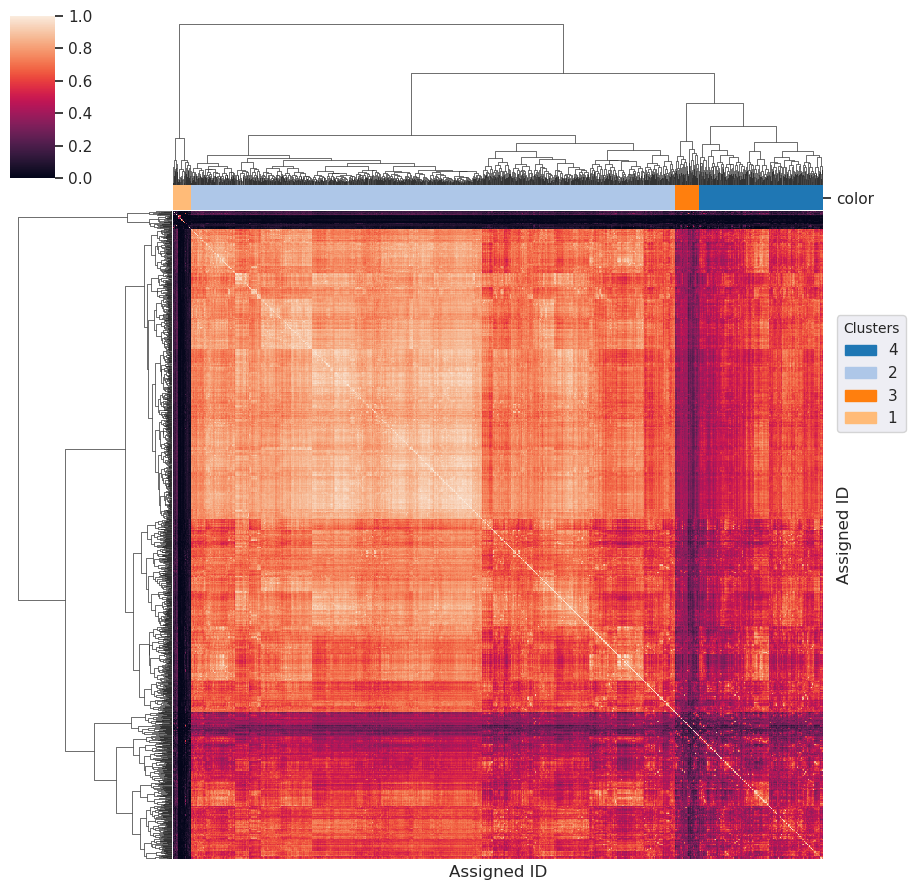

In [30]:
clusters = global_clustering(DF_log_tpm_passed_step2)

Select clusters to remove.

In [31]:
remove_clusters = [1]
passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

The following code can be adapted to see the NCBI SRA accession for samples in each cluster.

In [32]:
clusters[clusters == 1]

Assigned ID
GSM5197675_1    1
GSM5197675_2    1
GSM5197677_1    1
GSM5197677_2    1
GSM5197678_1    1
GSM5197679_2    1
GSM5197679_1    1
GSM5197730_2    1
GSM5197730_1    1
GSM5197887_1    1
GSM5197887_2    1
GSM5197888_1    1
GSM5197888_2    1
GSM5197889_1    1
GSM5197890_2    1
GSM5197890_1    1
GSM5197881_1    1
GSM5197881_2    1
GSM5197883_1    1
GSM5197883_2    1
GSM5197885_2    1
GSM5197885_1    1
GSM5197886_1    1
GSM5197886_2    1
GSM5197917_1    1
GSM5197917_2    1
GSM5197920_1    1
GSM5197920_2    1
GSM5197032_1    1
GSM5197032_2    1
GSM5197040_1    1
GSM5197040_2    1
GSM5197043_2    1
GSM5197043_1    1
GSM5197039_1    1
GSM5197039_2    1
GSM5197111_2    1
GSM5197345_1    1
GSM5197345_2    1
GSM5197346_1    1
GSM5197346_2    1
GSM5197327_2    1
GSM5197327_1    1
GSM5197357_2    1
GSM5197860_1    1
GSM5197860_2    1
Name: cluster, dtype: int32

Re-cluster samples to ensure all outliers were removed.

In [33]:
DF_log_tpm_passed_step3 = DF_log_tpm[passed_global_corr]

Number of cluster:  5


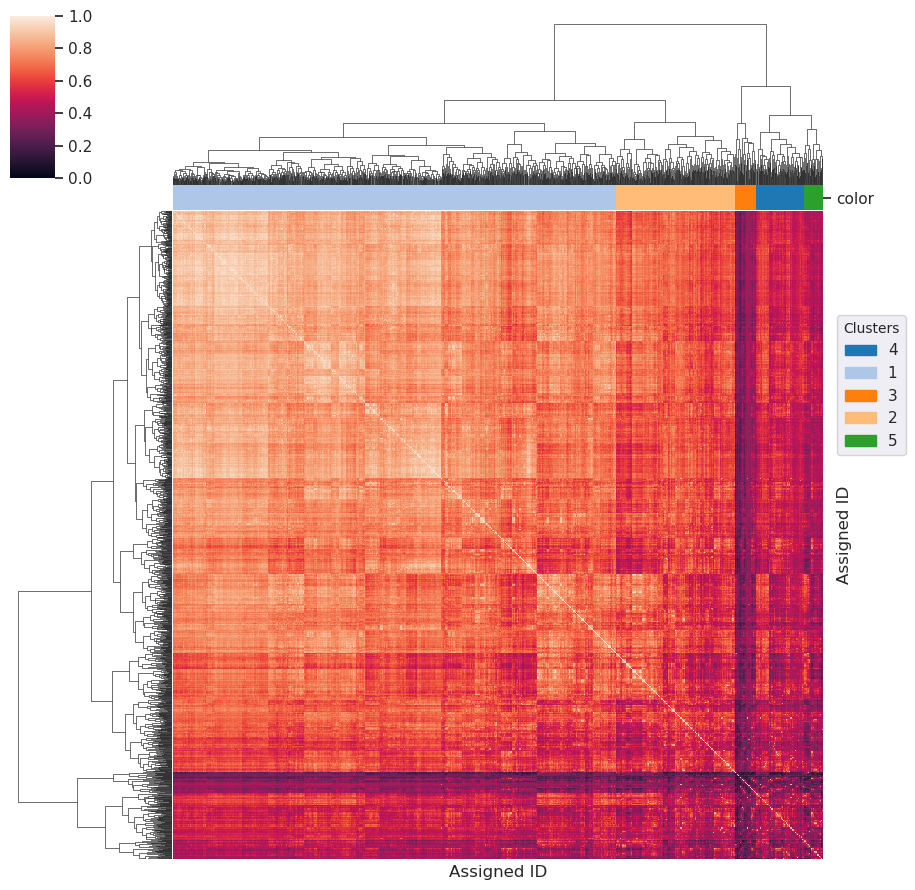

In [34]:
clusters = global_clustering(DF_log_tpm_passed_step3)

In [35]:
remove_clusters = [3]
passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

In [36]:
DF_log_tpm_passed_step3 = DF_log_tpm[passed_global_corr]

Number of cluster:  9


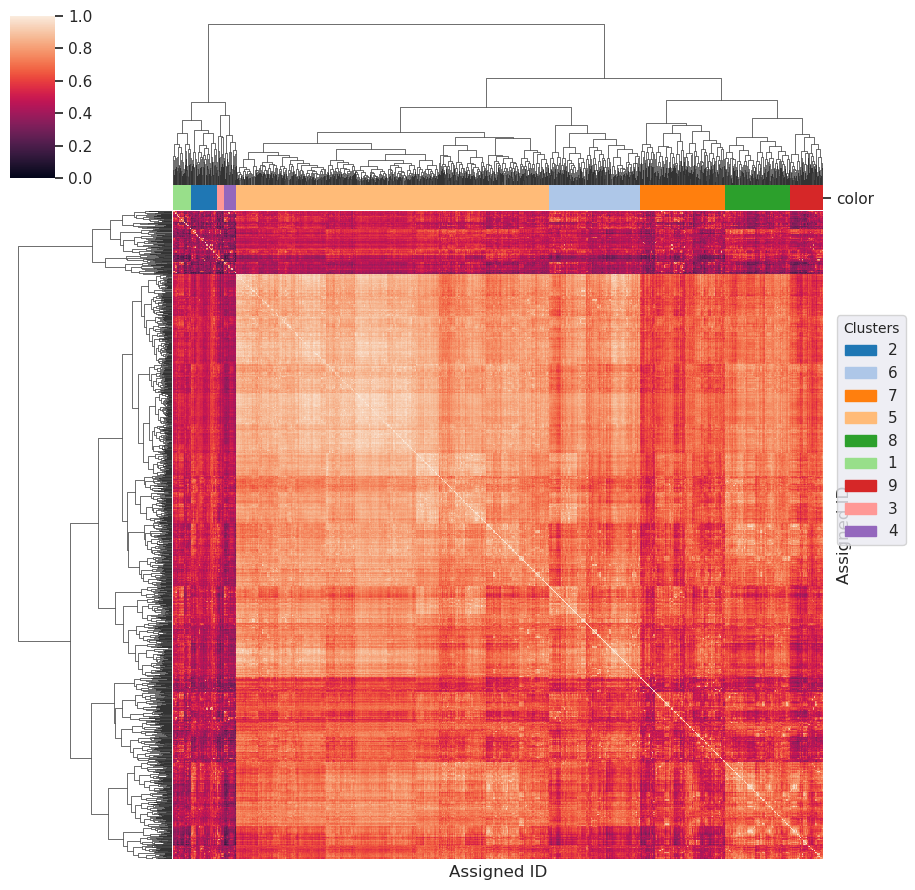

In [37]:
clusters = global_clustering(DF_log_tpm_passed_step3)

Once you are satisfied with your dataset, mark the samples that passed the global correlation

In [38]:
DF_metadata['passed_global_correlation'] = DF_metadata.index.isin(passed_global_corr)

In [41]:
len(passed_global_corr)

1511

# Remove failed samples

In [42]:
qc_columns = ['passed_global_correlation']

In [43]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

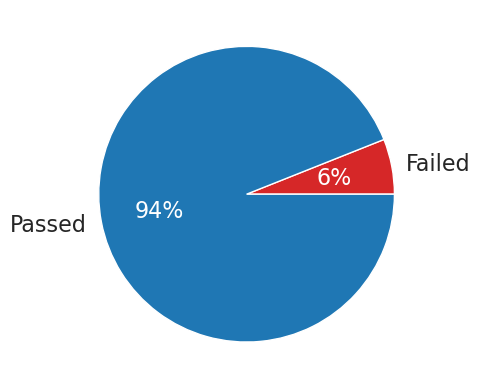

In [44]:
_,_,pcts = plt.pie(pass_qc.value_counts().reindex([False,True]),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Save current metadata

Enter path of interim metadata files here. It is recommended that the ``metadata_qc.tsv`` file is copied to a new ``metadata_qc_curated.tsv`` file before editing. This will prevent this notebook from over-writing any curated metadata.

In [46]:
metadata_all_qc_file = path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/6_quality_control/metadata_all.tsv') # Enter filename
                                 #for full metadata QC file

In [48]:
DF_metadata.to_csv(metadata_all_qc_file, sep='\t')
#DF_metadata_passed.to_csv(metadata_qc_file, sep='\t')

# Metadata Curation

The next step is to curate the metadata. At a minimum, three new columns must be added to the metadata sheet:
* ``project``: Nickname for the project. Each bioproject should have a unique project IDs.
* ``condition``: Nickname for the experimental condition. Biological/technical replicates must have identical condition IDs.
* ``reference_condition``: Condition ID of the reference condition. Each project has a single reference condition (See [example metadata sheet](https://github.com/SBRG/nf-rnaseq-bacteria/blob/master/example_data/processed_data/metadata_curated.tsv))

Additional columns may include:
* ``strain_description``: The strain name, and any knock-outs or overexpressed genes
* ``base_media``: Media used (e.g. ``M9``)
* ``carbon_source``: Primary carbon source, with concentration in parentheses (e.g. ``glucose(.4%)``). This is usually empty for undefined media.
* ``nitrogen_source``: Primary nitrogen source, with concentration in parentheses (e.g. ``NH4Cl(1M)``). This is usually empty for undefined media.
* ``aerobicity``: Usually ``aerobic`` or ``anaerobic``
* ``treatment``: Any additional supplements or treatments added to the base media (e.g. ``thiamine(0.1M)`` or ``ampicillin(100ug/mL)``)
* ``temperature``
* ``pH``
* ``OD``: Approximate optical density of cells when selected for library preparation
* ``growth_phase``: e.g. ``mid-exponential`` or ``stationary``
* ``culture_type``: Usually ``batch`` or ``chemostat``
* ``skip``: Whether to skip a sample due to external reasons (e.g. not traditional RNA-seq, distant strain, or lack of metadata)

If specific metadata entries are not reported for a sample, these can be left blank. However, if no metadata can be gleaned from public databases, then we recommend discarding the samples.

Once the metadata has been curated, proceed to [Step 2](https://github.com/avsastry/modulome-workflow/edit/main/3_quality_control/expression_QC_part2.ipynb)